#### Concrete Strength Prediction_ Exercise

#### Feature Description

    Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
    Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
    Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
    Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
    Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
    Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
    Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
    Age -- quantitative -- Day (1~365) -- Input Variable
    Concrete Compressive Strength -- quantitative -- MPa -- Output Variable



#### Steps
1) Read the dataset.<br>
2) Handlue Null values (if any).<br>
3) Handle dupliacte records (if any)<br>
4) Check Pairplot<br>
5) Plot heatmap for correlation<br>
6) Handle upper and lower outliers at 3 and 97 percentile<br>
7) Split the data into training and test data with test size as 25%.<br>
8) Standardize the data using StandardScaler<br>
9) Create Linear_Reg,Ridge_Reg,Lasso_Reg models and generate their prediction result.<br>
10) Also compute MSE,MAE,RMSE,R2_score for each of these models.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [20]:
df = pd.read_csv('concrete_Data.csv')
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [21]:
df.shape

(1030, 9)

In [22]:
df.dtypes

cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
dtype: object

In [23]:
df.duplicated().sum()

25

In [24]:
df.drop_duplicates(inplace=True)
df.shape

(1005, 9)

In [25]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

#### Unvariate Analysis

In [26]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [27]:
df['age'].value_counts()

28     419
3      129
7      122
56      86
14      62
90      54
100     52
180     26
91      17
365     14
270     13
360      6
120      3
1        2
Name: age, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


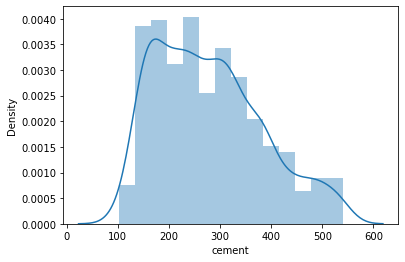

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


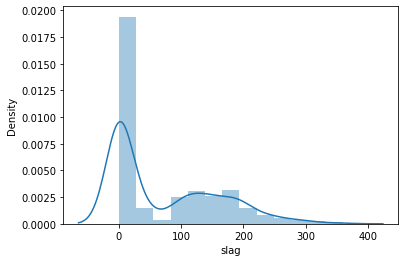

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


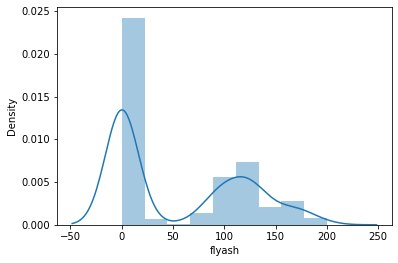

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


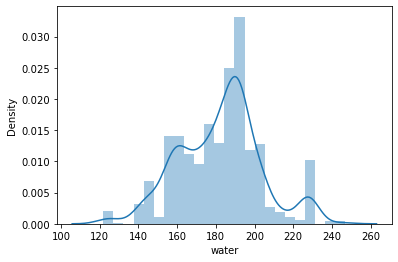

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


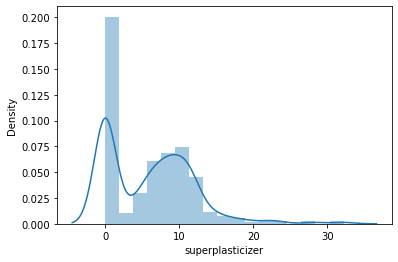

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


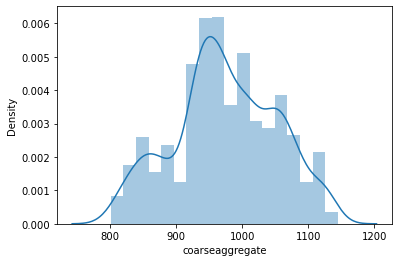

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


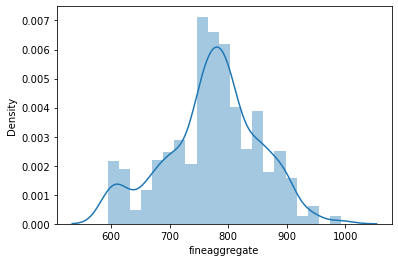

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


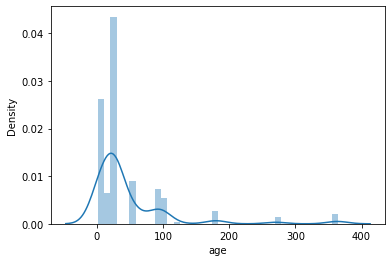

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


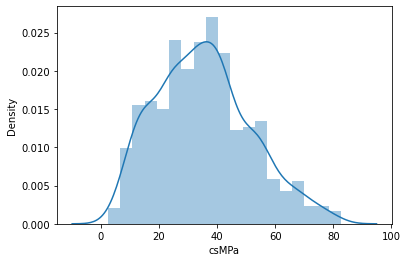

In [28]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

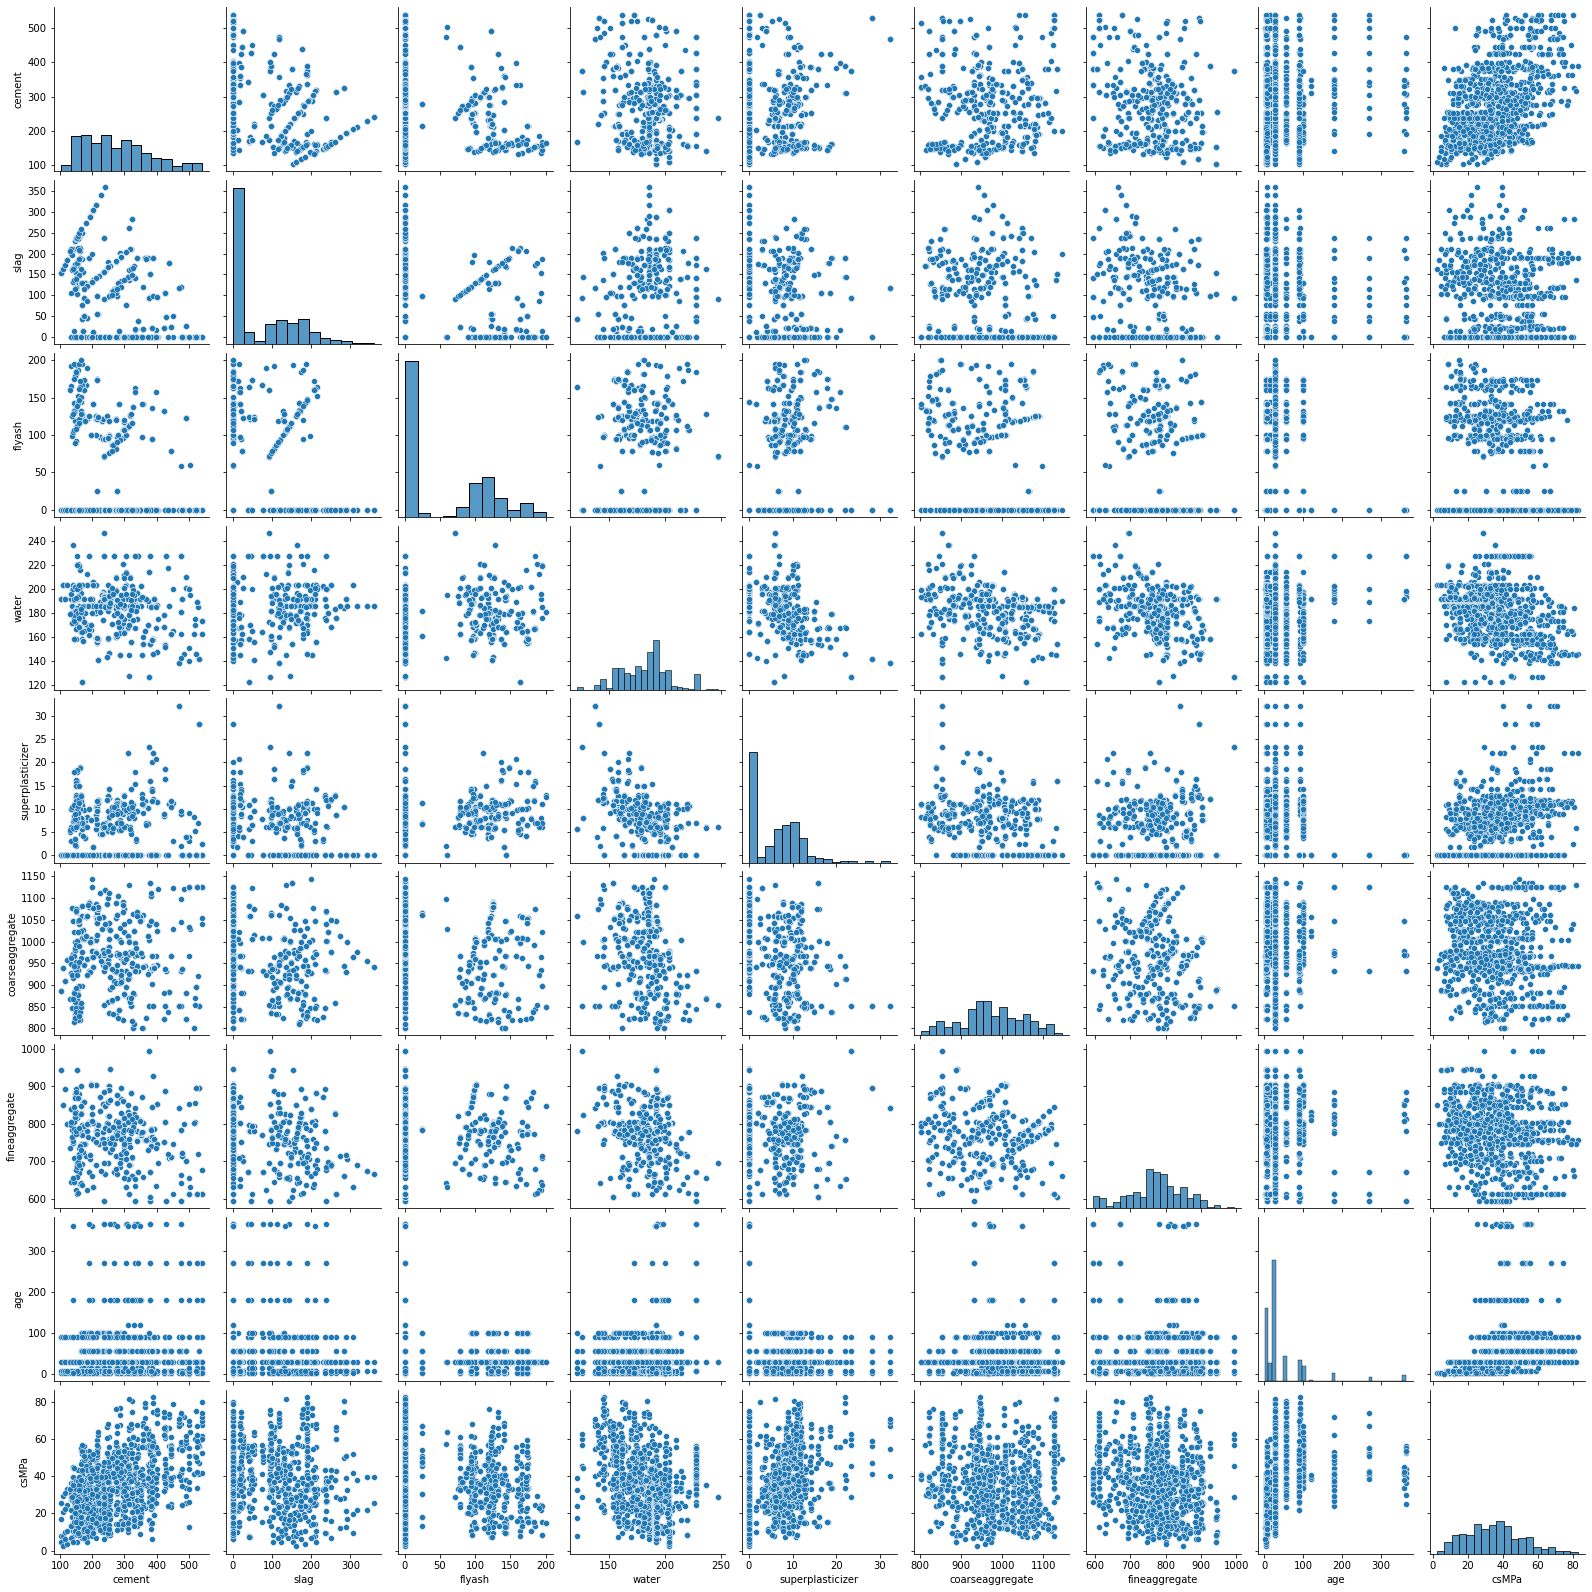

In [29]:
sns.pairplot(data=df)
plt.show()

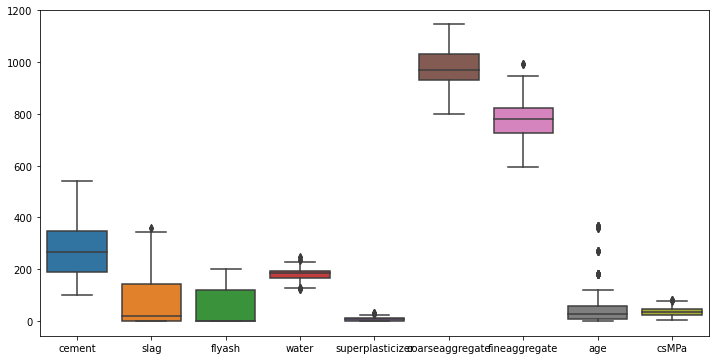

In [30]:
plt.subplots(figsize=(12, 6))
sns.boxplot(data=df)
plt.show()

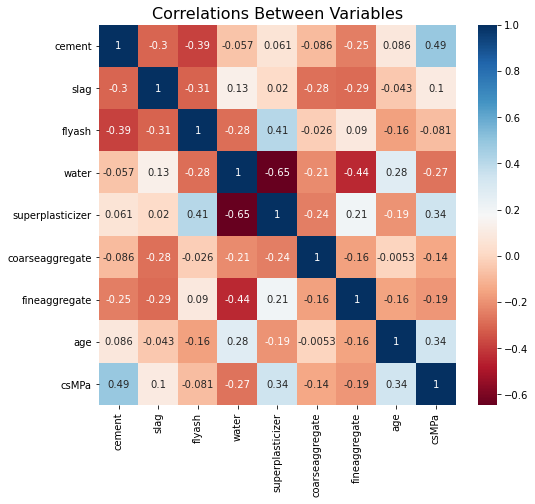

In [31]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=16)
plt.show()

### Outlier clipping

In [32]:
df.describe(percentiles=[0.01,0.02,0.03,0.95,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,50%,95%,97%,98%,99%,max
cement,1005.0,278.631343,104.344261,102.00,116.0000,133.0000,136.0480,265.0,480.000,500.000,525.000,531.3000,540.0
slag,1005.0,72.043483,86.170807,0.00,0.0000,0.0000,0.0000,20.0,236.000,250.200,272.800,290.2000,359.4
flyash,1005.0,55.536318,64.207969,0.00,0.0000,0.0000,0.0000,0.0,167.000,174.200,174.884,185.2880,200.1
water,1005.0,182.075323,21.339334,121.80,127.0120,140.8000,143.3000,185.7,228.000,228.000,228.000,228.0000,247.0
superplasticizer,1005.0,6.033234,5.919967,0.00,0.0000,0.0000,0.0000,6.1,15.240,18.564,22.000,23.4000,32.2
coarseaggregate,1005.0,974.376816,77.579667,801.00,817.9040,822.0000,824.0000,968.0,1104.000,1124.928,1125.000,1125.0000,1145.0
fineaggregate,1005.0,772.688259,80.340435,594.00,594.0000,594.0000,605.0000,780.0,899.800,903.800,925.700,943.1000,992.6
age,1005.0,45.856716,63.734692,1.00,3.0000,3.0000,3.0000,28.0,180.000,270.000,270.000,365.0000,365.0
csMPa,1005.0,35.250378,16.284815,2.33,6.8808,8.0048,9.4632,33.8,65.868,68.720,72.284,75.4796,82.6


In [33]:
def outlier_treatment(x):
    x = x.clip(upper= x.quantile(0.97))
    x = x.clip(lower = x.quantile(0.03))
    return x

In [34]:
df = df.apply(outlier_treatment)

In [35]:
df.describe(percentiles=[0.01,0.02,0.03,0.95,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,50%,95%,97%,98%,99%,max
cement,1005.0,278.204565,101.799669,136.0480,136.0480,136.0480,136.090240,265.0,480.000,500.00000,500.000,500.000,500.000
slag,1005.0,70.809154,83.110039,0.0000,0.0000,0.0000,0.000000,20.0,236.000,250.20000,250.200,250.200,250.200
flyash,1005.0,55.254328,63.644902,0.0000,0.0000,0.0000,0.000000,0.0,167.000,174.20000,174.200,174.200,174.200
water,1005.0,182.294030,20.583318,143.3000,143.3000,143.3000,143.300000,185.7,228.000,228.00000,228.000,228.000,228.000
superplasticizer,1005.0,5.864860,5.403567,0.0000,0.0000,0.0000,0.000000,6.1,15.240,18.53232,18.564,18.564,18.564
coarseaggregate,1005.0,974.540565,76.943713,824.0000,824.0000,824.0000,824.000000,968.0,1104.000,1124.86464,1124.928,1124.928,1124.928
fineaggregate,1005.0,771.982985,77.514617,605.0000,605.0000,605.0000,605.000000,780.0,899.800,903.80000,903.800,903.800,903.800
age,1005.0,44.000000,55.218671,3.0000,3.0000,3.0000,3.000000,28.0,180.000,270.00000,270.000,270.000,270.000
csMPa,1005.0,35.140964,15.727867,9.4632,9.4632,9.4632,9.474816,33.8,65.868,68.69360,68.720,68.720,68.720


In [20]:
# print(df['water'].quantile(0.03))
# print(df['water'].quantile(0.97))

In [21]:
# df["cement"] = np.where(df["cement"] <136.048, 136.048,df['cement'])
# df["cement"] = np.where(df["cement"] >500.00, 500.00,df['cement'])
# df["slag"] = np.where(df["slag"] >250.20, 250.20,df['slag'])
# df["flyash"] = np.where(df["flyash"] >174.20, 174.20,df['flyash'])
# df["water"] = np.where(df["water"] <143.3, 143.3,df['water'])
# df["water"] = np.where(df["water"] >228.0, 228.0,df['water'])
# df["superplasticizer"] = np.where(df["superplasticizer"] >18.564, 18.564,df['superplasticizer'])
# df["coarseaggregate"] = np.where(df["coarseaggregate"] >824.0, 824.0,df['coarseaggregate'])
# df["coarseaggregate"] = np.where(df["coarseaggregate"] >1124.928, 1124.928,df['coarseaggregate'])
# df["fineaggregate"] = np.where(df["fineaggregate"] <605.00, 605.00,df['fineaggregate'])
# df["fineaggregate"] = np.where(df["fineaggregate"] >903.80,903.80,df['fineaggregate'])
# df["age"] = np.where(df["age"] <3.0, 3.0,df['age'])
# df["age"] = np.where(df["age"] >270.0, 270.0,df['age'])

# df["csMPa"] = np.where(df["csMPa"] <9.4632,9.4632,df['csMPa'])
# df["csMPa"] = np.where(df["csMPa"] >68.720,68.720,df['csMPa'])

In [36]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,500.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,68.72
1,500.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,605.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,605.0,270,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,270,44.30


In [48]:
x = df.drop("csMPa", axis=1)
y = df["csMPa"]

In [49]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(753, 8)
(252, 8)
(753,)
(252,)


In [51]:
def evaluate(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse,rmse, r_squared

In [52]:
models = pd.DataFrame(columns=["Model", "MAE", "MSE", "r2 Score",'RMSE'])
models

,Model,MAE,MSE,r2 Score,RMSE


In [53]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [54]:
m1 = LinearRegression()
m1.fit(x_train, y_train)
ypred_m1 = m1.predict(x_test)

In [55]:
mae, mse,rmse, r2 = evaluate(y_test, ypred_m1)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("r2 Score:", r2)

MAE: 7.974473369482311
MSE: 101.72194173698021
RMSE: 10.08572960855982
r2 Score: 0.6094454359738173


In [57]:
new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE": rmse}
models = models.append(new_row,ignore_index=True)
models

,Model,MAE,MSE,r2 Score,RMSE
0,LinearRegression,7.974473,101.721942,0.609445,10.08573


#### Lasso

In [60]:
m2 = Lasso(alpha=0.01)
m2.fit(x_train, y_train)
ypred_m2 = m2.predict(x_test)

mae, mse,rmse, r2 = evaluate(y_test, ypred_m2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("r2 Score:", r2)

MAE: 7.9775253962225365
MSE: 101.7659792494644
RMSE: 10.087912531810751
r2 Score: 0.6092763569020323


In [61]:
new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE": rmse}
models = models.append(new_row, ignore_index=True)
models

,Model,MAE,MSE,r2 Score,RMSE
0,LinearRegression,7.974473,101.721942,0.609445,10.085730
1,Lasso,7.977525,101.765979,0.609276,10.087913
2,Lasso,7.977525,101.765979,0.609276,10.087913


In [62]:
models.drop(index=2,inplace=True)
models

,Model,MAE,MSE,r2 Score,RMSE
0,LinearRegression,7.974473,101.721942,0.609445,10.085730
1,Lasso,7.977525,101.765979,0.609276,10.087913


In [63]:
m3 = Ridge(alpha=0.01)
m3.fit(x_train, y_train)
ypred_m3 = m3.predict(x_test)

mae, mse,rmse, r2 = evaluate(y_test, ypred_m3)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("r2 Score:", r2)

MAE: 7.974496632577326
MSE: 101.7221157852667
RMSE: 10.085738236999148
r2 Score: 0.6094447677271098


In [64]:
new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE": rmse}
models = models.append(new_row, ignore_index=True)
models

,Model,MAE,MSE,r2 Score,RMSE
0,LinearRegression,7.974473,101.721942,0.609445,10.085730
1,Lasso,7.977525,101.765979,0.609276,10.087913
2,Ridge,7.974497,101.722116,0.609445,10.085738


In [65]:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
poly = PolynomialFeatures(degree=2)
x_train_poly  = poly.fit_transform(x_train)
x_test_poly  = poly.fit_transform(x_test)

In [68]:
print(x_train_poly.shape)
print(x_test_poly.shape)
print(x_train.shape)
print(x_test.shape)

(753, 45)
(252, 45)
(753, 8)
(252, 8)


In [69]:
m4 = LinearRegression()
m4.fit(x_train_poly,y_train)
ypred_m4 = m4.predict(x_test_poly)

mae, mse,rmse, r2 = evaluate(y_test, ypred_m4)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("r2 Score:", r2)


MAE: 5.810730529903548
MSE: 59.78464681257068
RMSE: 7.732053208079383
r2 Score: 0.7704608634809962


In [70]:
new_row = {"Model": "Poly_Reg(d=2)","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE": rmse}
models = models.append(new_row, ignore_index=True)
models

,Model,MAE,MSE,r2 Score,RMSE
0,LinearRegression,7.974473,101.721942,0.609445,10.085730
1,Lasso,7.977525,101.765979,0.609276,10.087913
2,Ridge,7.974497,101.722116,0.609445,10.085738
3,Poly_Reg(d=2),5.810731,59.784647,0.770461,7.732053


#### Poly Reg

In [71]:
d1 = {'x':[1,2,3,4,5,6,7],
     'y':[5,7,13,21,35,51,75]}
df_poly = pd.DataFrame(d1)
df_poly

,x,y
0,1,5
1,2,7
2,3,13
3,4,21
4,5,35
5,6,51
6,7,75


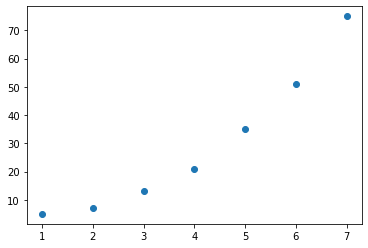

In [74]:
plt.scatter(df_poly['x'],df_poly['y'])
plt.show()

In [75]:
xp = df_poly[['x']]

poly = PolynomialFeatures(degree=2)
xp_poly_d2  = poly.fit_transform(xp)
print(xp_poly_d2)
# no_of input_features   degree     terms
#        1[a]              2         [1,a,a2]  

[[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]
 [ 1.  6. 36.]
 [ 1.  7. 49.]]
